

#   RAG EVALUATION  - QA RAG System on Asthma - RAGAS FRAMEWORK

#   CONTEXT_PRECISION, CONTEXT_RECALL, CORRECTNESS , RELEVANCY , FAITHFULNESS

## Install OpenAI, and LangChain dependencies

In [ ]:
!pip install langchain==0.3.11
!pip install langchain-openai==0.2.12
!pip install langchain-community==0.3.11
!pip install langchain-chroma==0.1.4
!pip install sentence-transformers==2.7.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.8 MB/s eta 0:00:00
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.14
    Uninstalling langchain-0.3.14:
      Successfully uninstalled langchain-0.3.14
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.0 MB/s eta 0:0

## Enter Open AI API Key

In [ ]:
from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key: ')

Enter Open AI API Key: ··········


In [ ]:
import os
OPENAI_API_KEY = OPENAI_KEY
os.environ['OPENAI_API_KEY'] = OPENAI_KEY

### Open AI Embedding Models

LangChain enables us to access Open AI embedding models which include the newest models: a smaller and highly efficient `text-embedding-3-small` model, and a larger and more powerful `text-embedding-3-large` model.

In [ ]:
from langchain_openai import OpenAIEmbeddings
openai_embed_model = OpenAIEmbeddings(
    model='text-embedding-3-small',
    openai_api_key=OPENAI_KEY  # Use the api_key from getpass
)

In [ ]:
%%capture
!pip install unstructured selenium textstat tiktoken

In [ ]:
import tiktoken
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from textstat import flesch_reading_ease
from collections import Counter

In [ ]:
!pip install -q ragas langchain-experimental

from ragas import evaluate
from datasets import Dataset

from ragas.metrics import faithfulness, answer_relevancy, context_precision, context_recall, context_entity_recall, answer_similarity, answer_correctness

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.9/176.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
website = "https://my.clevelandclinic.org/health/diseases/6424-asthma"

In [ ]:
def load_document(loader_class, website_url):
    """
    Load a document using the specified loader class and website URL.

    Args:
    loader_class (class): The class of the loader to be used.
    website_url (str): The URL of the website from which to load the document.

    Returns:
    str: The loaded document.
    """
    loader = loader_class([website_url])
    return loader.load()

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
from langchain.document_loaders import UnstructuredURLLoader, SeleniumURLLoader

In [ ]:
selenium_loader_doc = load_document(SeleniumURLLoader, website)

In [ ]:
len(selenium_loader_doc)

1

In [ ]:
selenium_loader_doc[0]

Document(metadata={'source': 'https://my.clevelandclinic.org/health/diseases/6424-asthma', 'title': 'Asthma: Types, Causes, Symptoms, Diagnosis & Treatment', 'description': 'Asthma is a chronic disease that affects the airways of your lungs. It can be managed but not cured. ', 'language': 'en'}, page_content='Locations:\n\nAbu Dhabi|Canada|Florida|London|Nevada|Ohio|\n\nHome/\n\nHealth Library/\n\nDiseases & Conditions/\n\nAsthma\n\nAdvertisement\n\nAdvertisement\n\nAsthma\n\nBronchial asthma (or asthma) is a lung disease. Your airways get narrow and swollen and are blocked by excess mucus. Medications can treat these symptoms.\n\nAdvertisement\n\nCleveland Clinic is a non-profit academic medical center. Advertising on our site helps support our mission. We do not endorse non-Cleveland Clinic products or services. Policy\n\nCare at Cleveland Clinic\n\nAsthma Treatment for Adults\n\nFind a Doctor and Specialists\n\nAsthma Treatment for Children\n\nFind a Pediatric Doctor and Specialists

### Split larger documents into smaller chunks

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(chunk_size=1450, chunk_overlap=200)
chunked_docs = splitter.split_documents(selenium_loader_doc)

## Vector Databases

One of the most common ways to store and search over unstructured data is to embed it and store the resulting embedding vectors, and then at query time to embed the unstructured query and retrieve the embedding vectors that are 'most similar' to the embedded query. A vector database takes care of storing embedded data and performing vector search for you.

### Chroma Vector DB

[Chroma](https://docs.trychroma.com/getting-started) is a AI-native open-source vector database focused on developer productivity and happiness. Chroma is licensed under Apache 2.0.

### Create a Vector DB and persist on disk

Here we initialize a connection to a Chroma vector DB client, and also we want to save to disk, so we simply initialize the Chroma client and pass the directory where we want the data to be saved to.

In [ ]:
from langchain_chroma import Chroma

chroma_db = Chroma.from_documents(documents=chunked_docs,
                                  collection_name='rag_asthma_db',
                                  embedding=openai_embed_model,
                                  collection_metadata={"hnsw:space": "cosine"},
                                  persist_directory="./asthma_db")

### Load Vector DB from disk

This is just to show once you have a vector database on disk you can just load and create a connection to it anytime

In [ ]:
# load from disk
chroma_db = Chroma(persist_directory="./asthma_db",
                   collection_name='rag_asthma_db',
                   embedding_function=openai_embed_model)

In [ ]:
chroma_db

## Load Connection to LLM

Here we create a connection to ChatGPT to use later in our chains

In [ ]:
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model_name='gpt-4o-mini', temperature=0,openai_api_key=OPENAI_KEY)

## Chained Retrieval Pipeline

This strategy uses a chain of multiple retrievers sequentially to get to the most relevant documents. The following is the flow

Similarity Retrieval → Compression Filter → Reranker Model Retrieval

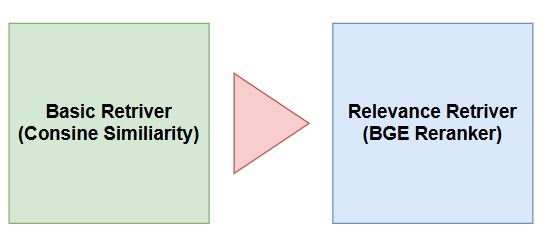

In [ ]:
from langchain_community.cross_encoders import HuggingFaceCrossEncoder
from langchain.retrievers.document_compressors import CrossEncoderReranker
from langchain.retrievers.document_compressors import LLMChainFilter
from langchain.retrievers import ContextualCompressionRetriever

# Retriever 1 - simple cosine distance based retriever
similarity_retriever = chroma_db.as_retriever(search_type="similarity",
                                              search_kwargs={"k": 5})

#  decides which of the initially retrieved documents to filter out and which ones to return
_filter = LLMChainFilter.from_llm(llm=chatgpt)
# Retriever 2 - retrieves the documents similar to query and then applies the filter
compressor_retriever = ContextualCompressionRetriever(
    base_compressor=_filter, base_retriever=similarity_retriever
)

# download an open-source reranker model - BAAI/bge-reranker-v2-m3
reranker = HuggingFaceCrossEncoder(model_name="BAAI/bge-reranker-large")
reranker_compressor = CrossEncoderReranker(model=reranker, top_n=3)
# Retriever 3 - Uses a Reranker model to rerank retrieval results from the previous retriever
final_retriever = ContextualCompressionRetriever(
    base_compressor=reranker_compressor, base_retriever=compressor_retriever
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/801 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

In [ ]:
query = "What asthma treatment options are there?"
docs = final_retriever.invoke(query)
docs

[Document(metadata={'description': 'Asthma is a chronic disease that affects the airways of your lungs. It can be managed but not cured. ', 'language': 'en', 'source': 'https://my.clevelandclinic.org/health/diseases/6424-asthma', 'title': 'Asthma: Types, Causes, Symptoms, Diagnosis & Treatment'}, page_content='Diagnosis and Tests\n\nHow do healthcare providers diagnose asthma?\n\nYour healthcare provider will review your medical history, including information about your parents and siblings. Your provider will also ask you about your symptoms. Your provider will need to know any history of allergies, eczema (a bumpy rash caused by allergies) and other lung diseases.\n\nYour provider may order spirometry. This test measures airflow through your lungs and is used to diagnose and monitor your progress with treatment. Your healthcare provider may order a chest X-ray, blood test or skin test.\n\nManagement and Treatment\n\nWhat asthma treatment options are there?\n\nYou have options to help

In [ ]:
query = "How do healthcare providers diagnose asthma?"
docs = final_retriever.invoke(query)
docs

[Document(metadata={'description': 'Asthma is a chronic disease that affects the airways of your lungs. It can be managed but not cured. ', 'language': 'en', 'source': 'https://my.clevelandclinic.org/health/diseases/6424-asthma', 'title': 'Asthma: Types, Causes, Symptoms, Diagnosis & Treatment'}, page_content='Diagnosis and Tests\n\nHow do healthcare providers diagnose asthma?\n\nYour healthcare provider will review your medical history, including information about your parents and siblings. Your provider will also ask you about your symptoms. Your provider will need to know any history of allergies, eczema (a bumpy rash caused by allergies) and other lung diseases.\n\nYour provider may order spirometry. This test measures airflow through your lungs and is used to diagnose and monitor your progress with treatment. Your healthcare provider may order a chest X-ray, blood test or skin test.\n\nManagement and Treatment\n\nWhat asthma treatment options are there?\n\nYou have options to help

## Build a QA RAG Chain

To build a RAG chain we need a prompt template which instructs the LLM to not answer questions beyond the scope of the retrieved context documents, there are various such prompts out there, we craft one ourselves below

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

prompt = """You are an assistant for question-answering tasks.
            Use the following pieces of retrieved context to answer the question.
            If no context is present or if you don't know the answer, just say that you don't know.
            Do not make up the answer unless it is there in the provided context.
            Give a detailed answer with regard to the question.

            Question:
            {question}

            Context:
            {context}

            Answer:
         """

prompt_template = ChatPromptTemplate.from_template(prompt)

## QA RAG Chain



In [ ]:
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate

qa_chain = RetrievalQA.from_chain_type(
        llm=chatgpt,
        retriever=final_retriever,
        return_source_documents=True,
        chain_type_kwargs={"prompt": PromptTemplate.from_template(prompt)}
    )

In [ ]:
queries = [
    "what are Bronchodilators?",
    "How do healthcare providers diagnose asthma?",
    "Who can get asthma?",
    "Can asthma be cured?",
    "What causes asthma?"

]

ground_truths = [
    "These medicines relax the muscles around your airways. The relaxed muscles let the airways move air. They also let mucus move more easily through the airways. These medicines relieve your symptoms when they happen and are used for intermittent and chronic asthma",
    "Your healthcare provider will review your medical history, including information about your parents and siblings. Your provider will also ask you about your symptoms. Your provider will need to know any history of allergies, eczema (a bumpy rash caused by allergies) and other lung diseases.Your provider may order spirometry. This test measures airflow through your lungs and is used to diagnose and monitor your progress with treatment. Your healthcare provider may order a chest X-ray, blood test or skin test.",
    "Anyone can develop asthma at any age. People with allergies or people exposed to tobacco smoke are more likely to develop asthma. This includes secondhand smoke (exposure to someone else who is smoking) and thirdhand smoke (exposure to clothing or surfaces in places where some has smoked).Statistics show that people assigned female at birth tend to have asthma more than people assigned male at birth. Asthma affects Black people more frequently than other races.",
    "No. Asthma can’t be cured, but it can be managed. Children may outgrow asthma as they get older.",
    "Researchers don’t know why some people have asthma while others don’t. But certain factors present a higher risk:Allergies: Having allergies can raise your risk of developing asthma.Environmental factors: People can develop asthma after exposure to things that irritate the airways. These substances include allergens, toxins, fumes and second- or third-hand smoke. These can be especially harmful to infants and young children whose immune systems haven’t finished developing.Genetics: If your family has a history of asthma or allergic diseases, you have a higher risk of developing the disease.Respiratory infections: Certain respiratory infections, such as respiratory syncytial virus (RSV), can damage young children’s developing lungs."
]

In [ ]:

results = []
contexts = []
for query in queries:
    result = qa_chain({"query": query})

    results.append(result['result'])
    sources = result["source_documents"]
    contents = []
    for i in range(len(sources)):
        contents.append(sources[i].page_content)
    contexts.append(contents)

d = {
    "question": queries,
    "answer": results,
    "contexts": contexts,
    "ground_truth": ground_truths
}

<ipython-input-25-e035f07b116d>:4: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa_chain({"query": query})


In [ ]:
!pip install openai

In [ ]:
dataset = Dataset.from_dict(d)
from ragas import evaluate
#from ragas.metrics import faithfulness, answer_relevancy, context_precision, context_recall, context_entity_recall, answer_similarity, answer_correctness, harmfulness
score = evaluate(dataset, metrics=[faithfulness, answer_relevancy, context_precision, context_recall, context_entity_recall, answer_similarity, answer_correctness])
score_df = score.to_pandas()
#score_df.to_csv("EvaluationScores.csv", encoding="utf-8", index=False)

score_df[['faithfulness','answer_relevancy', 'context_precision', 'context_recall',
       'context_entity_recall', 'answer_correctness'
       ]].mean(axis=0)

Evaluating:   0%|          | 0/35 [00:00<?, ?it/s]

,0
faithfulness,0.971429
answer_relevancy,0.759937
context_precision,1.000000
context_recall,0.971429
context_entity_recall,0.455962
answer_correctness,0.761975
